# 量子もつれと実デバイスでの測定
エンタングルメント状態を作り実デバイスで測定してみます。

量子計算上でも重要な状態となる、量子もつれ状態（エンタングルメント状態）を生成してみましょう。
量子もつれ状態とは2つの量子ビットが、強い関連性で結ばれた状態を指します。
量子暗号や、量子テレポーテーションなどで利用されます。

2量子ビットの状態の1つの例が次のような形になります。
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

これは、「片方の量子ビットが$|0\rangle$の場合に、もう片方の量子ビットも$|0\rangle$になっている」状態と、「片方の量子ビットが$|1\rangle$の場合に、もう片方の量子ビットも$|1\rangle$になっている」状態の重ね合わせ状態になっています。つまり、片方の量子ビットの状態が決まると、残りの量子ビットが確定するような状態となっています。別の言い方をすると、$|00\rangle$と$|11\rangle$という2つのデータが半々の確率で観測されることを示しています。<br>
では、実際にこの量子状態を作ってみましょう。<br>
最初に、2つの量子ビットを$|00\rangle$を準備します。

In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}

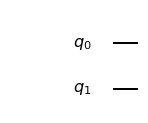

In [3]:
# 2量子ビット回路を用意
qe = QuantumCircuit(2)    # 今回は量子ビットのみ用意します。

# 回路を描画
qe.draw(output="mpl")

次に、片方の量子ビットを重ね合わせの状態にします。つまり、
$$ |00\rangle \rightarrow  \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle  $$

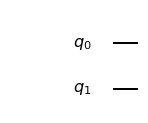

In [4]:
#qe # ← 修正して回路を完成させてください。片方の量子ビットに重ね合わせを掛けます。
qe.draw(output='mpl')

{'00': 1.0}


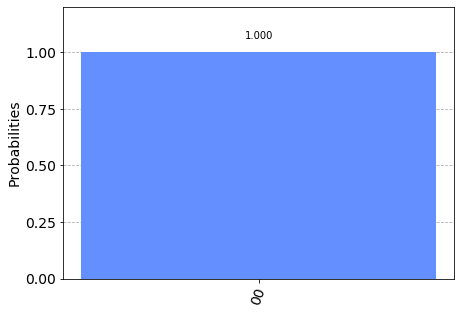

In [5]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(qe, vector_sim )

counts = job.result().get_counts(qe) # 実行結果の詳細を取り出し
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

その後、CXゲートを作用させます。量子ビット0をコントロールビット、量子ビット1をターゲットビットとします。すると、右側が1の量子ビットに対して、残った方の量子ビットを反転させます。（0⇔1）
$$ CX_{01} (\frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle) \rightarrow \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|11\rangle $$

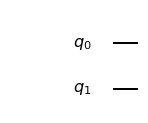

In [6]:
# qe # ← cxゲートを使って回路を完成させてください。順番に注意してください。
qe.draw(output='mpl')

では、シミュレーションをしてみて、どういう結果になるかを見てみましょう。

{'00': 1.0}


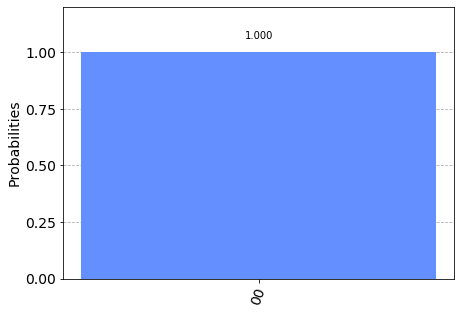

In [7]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(qe, vector_sim )
# result = job.result().get_statevector(qe, decimals=3)
# print(result)

counts = job.result().get_counts(qe) # 実行結果の詳細を取り出し
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

いかがでしょうか？最後の結果では、$|00\rangle$と$|11\rangle$が半分ずつになりましたでしょうか？

最後に実デバイスで測定してみましょう。

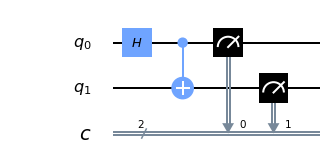

In [9]:
# 2量子ビット回路を用意
qe2 = QuantumCircuit(2,2)    # 量子ビットと古典レジスターを用意します

# 量子回路を設計
qe2.h(0) 
qe2.cx(0,1) 

# 回路を測定
qe2.measure(0,0)
qe2.measure(1,1)

# 回路を描画
qe2.draw(output="mpl")

{'00': 479, '11': 545}


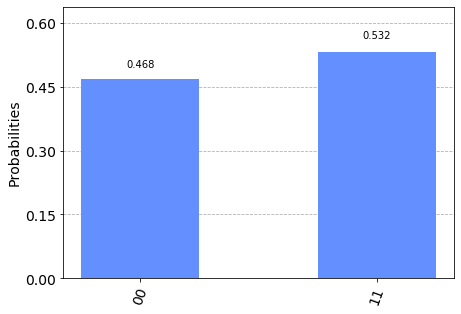

In [10]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(qe2, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(qe2)
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

それでは、量子コンピューターの実デバイスを使って計算してみます。

初めて実デバイスを実行する人は以下を行ってください。

## 実デバイスで計算するための準備

１）まだ、IBM Quantum Experienceにログインしたことがない人は、こちら https://quantum-computing.ibm.com/login からアカウントを作ります。

２）右上の人アイコンをクリックし「My Account」からAccount Settingに入ります。

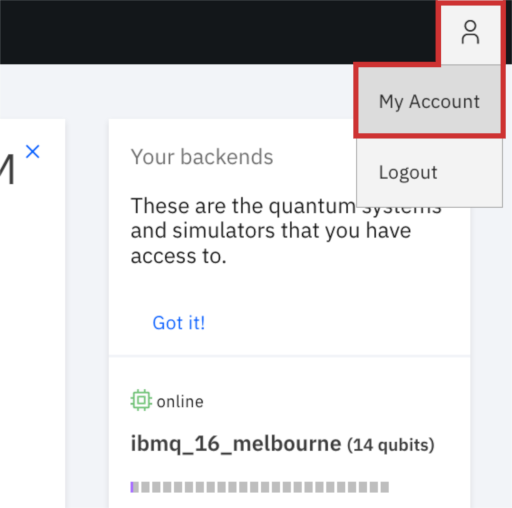

３）「Copy token」をクリックして、TOKENをコピーします。

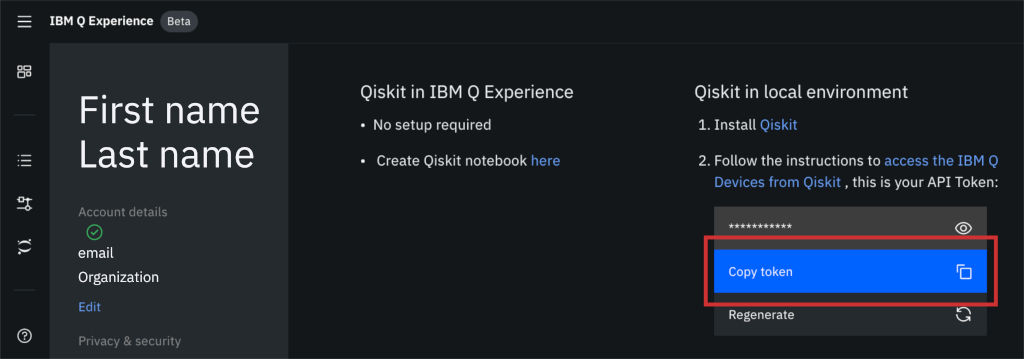

４）次のコマンドの'MY_API_TOKEN'の部分にコピーしたTOKENを貼り付け、実行します。

In [11]:
from qiskit import IBMQ
IBMQ.save_account('MY_API_TOKEN')

Credentials already present. Set overwrite=True to overwrite.


## APIトークンの準備が整っている方はこちらから

In [12]:
# IBM Q アカウントをロードします。
provider = IBMQ.load_account()

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]
The best backend is ibmq_burlington
run on real device!
{'01': 134, '00': 443, '11': 412, '10': 35}


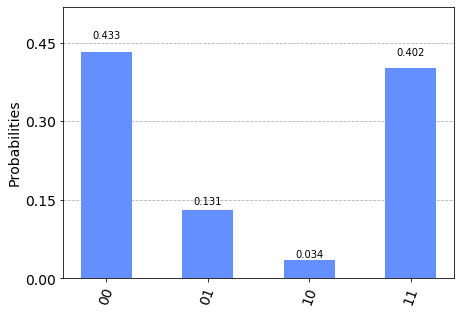

In [13]:
from qiskit.providers.ibmq import least_busy

# 実行可能な量子コンピューターをリストします
large_enough_devices = IBMQ.get_provider().backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator) 
print(large_enough_devices)

real_backend = least_busy(large_enough_devices)    # その中から、最も空いている量子コンピューターを選出
print("The best backend is " + real_backend.name())
print('run on real device!')

real_result = execute(qe2,real_backend).result()    # 計算を実行します

print(real_result.get_counts(qe2))    # 結果を表示
plot_histogram(real_result.get_counts(qe2))    # ヒストグラムを表示

シミュレーションの結果とは異なり、00と11以外の結果もわずかに出力されています。これは、実機で発生したノイズによるものです。 ノイズの発生自体は、古典コンピューター上でも発生していますが、内部的にそれを補正する仕組みが実装されているため、我々ユーザーがノイズを気にすることがないレベルまで進歩しています。しかし、量子コンピューターでもノイズは発生するのですが、それを除去する仕組みを実装することはハードウェアの性能上、現状では困難とされています。
そこで、ノイズが発生することを許容する中規模の量子コンピューター、NISQ(Noisy Intermediate-Scale Quantum Computer)デバイスの開発とそこで適用可能なアルゴリズムが実用に最も近いとされています。

今回実験した回路の他に、2量子ビットでは、以下のような状態も量子もつれ状態になります。
$$ \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle $$

ここまでの回路にもう１つ操作を加えると作ることができます。ぜひ、挑戦してみてください。
